In [79]:
import numpy as np

# 5a

This is done simply by doing the cumulative product of the constant retention rate

In [80]:

retention_rate = 0.56530017

retention_rates = [retention_rate]*12

survival_probability_const_retention_rate = np.cumprod(retention_rates)
print(survival_probability_const_retention_rate)


[0.56530017 0.31956428 0.18064974 0.10212133 0.05772921 0.03263433
 0.01844819 0.01042877 0.00589538 0.00333266 0.00188395 0.001065  ]


# 5b

Using almost the same as in the previous task. Getting the same averages for each month after acquisition, and then doing the cumulative product across the retention rates to get the active probabilities

In [81]:
from main import get_all_retention_rates_time_normalized, get_data

data = get_data()

get_all_retention_rates_months_after_acquisition = get_all_retention_rates_time_normalized(data)

avg_monthly_retention_rate_across_cohorts = np.apply_along_axis(np.nanmean,axis = 0, arr = get_all_retention_rates_months_after_acquisition)

print(avg_monthly_retention_rate_across_cohorts)
retention_probabilities = np.cumprod(avg_monthly_retention_rate_across_cohorts[1:-1])
print(retention_probabilities)

[       nan 0.48308715 0.11909775 0.24597981 0.42569815 0.44580342
 0.6        0.33333333 1.         1.         1.                nan]
[0.48308715 0.05753459 0.01415235 0.00602463 0.0026858  0.00161148
 0.00053716 0.00053716 0.00053716 0.00053716]


/opt/homebrew/lib/python3.10/site-packages/numpy/lib/shape_base.py:379: RuntimeWarning: Mean of empty slice
  res = asanyarray(func1d(inarr_view[ind0], *args, **kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/shape_base.py:402: RuntimeWarning: Mean of empty slice
  buff[ind] = asanyarray(func1d(inarr_view[ind], *args, **kwargs))


# 5c

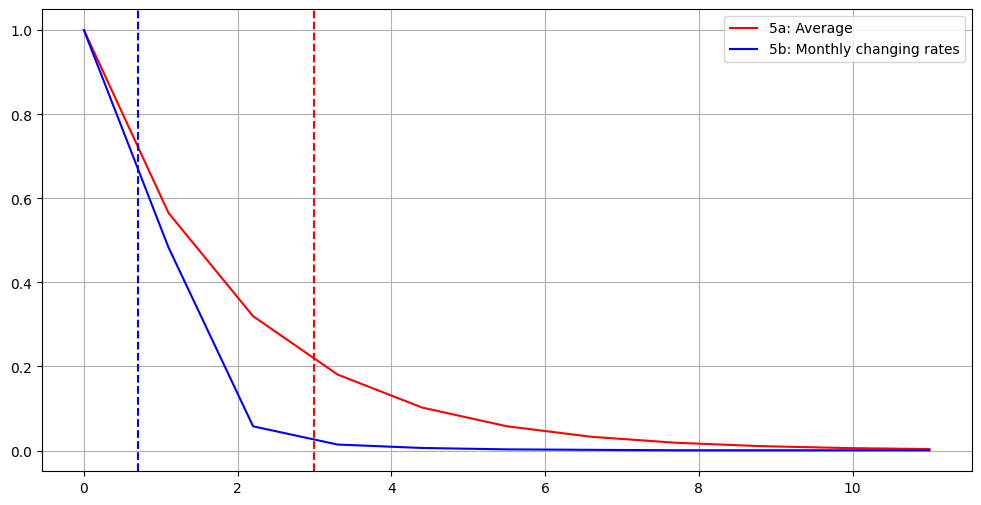

In [82]:
import matplotlib.pyplot as plt

# RUN ALL CELLS ABOVE BEFORE RUNNING THIS CELL

constant_rates_expected_lifetime = 2.9915769295055
changing_rates_expected_lifetime = 0.7060732139754536


survival_probability_const_retention_rate = np.insert(survival_probability_const_retention_rate, 0, 1)
retention_probabilities=np.insert(retention_probabilities, 0, 1)
t = np.linspace(0,11,11)
plt.figure(figsize=(12,6))
plt.plot(t, survival_probability_const_retention_rate[:11], color='r', label="5a: Average")
plt.plot(t, retention_probabilities, color='b', label="5b: Monthly changing rates")
plt.axvline(x=constant_rates_expected_lifetime, color='r', linestyle='--')
plt.axvline(x=changing_rates_expected_lifetime, color='b', linestyle='--')
plt.legend()
plt.grid()
plt.show()


We've added a survival probability of $1$ to $x=0$ to get a more accurate visual on how the survival probabilities drop. This number is technically $NaN$, but the survival probability of the first month is practically $1$ since a subscriber has to stay for at least one month.
The two methods are rather similar for $x=1$ and for $x>8$. other than those, the more realistic survival probability from changing monthly rates is way lower from $x=2$

# 5d

Based on the graph and discussion in 5c, using the constant retention rate will most likely overestimate CLV, while using the changing retention will underestimate CLV as we didn't account for the customers who've already subscribed for longer or for the acquired customers from our dataset that will stay for longer than a year.